# **Israel Elections Data Analysis - Lab 6**


**Daniel Ohayon - ID: 315453027**

**Olga Moroz - ID: 324756568**

### **Import modules**

In [1]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import math
import os
import io
from matplotlib import pyplot as plt
import numpy.matlib as mtl
import copy
import random
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Import data**

In [2]:
# Mount drive in google colab
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Loading elections 2020 elections data:
from google.colab import files
uploaded = files.upload()


Saving votes per ballot 2019b.csv to votes per ballot 2019b.csv
Saving votes per ballot 2020.csv to votes per ballot 2020.csv
Saving votes per city 2019b.csv to votes per city 2019b.csv
Saving votes per city 2020.csv to votes per city 2020.csv


In [4]:
df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_raw = df_2020_raw.drop(['מעטפות חיצוניות'], axis=0)
df_2019_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2019b.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2019_raw = df_2019_raw.drop(['מעטפות חיצוניות'], axis=0)


**:איחוד העבודה גשר מרצ גם בבחירות 2019 ושינוי האותיות של עוצמה יהודית ב-2019 מ-כף לנץ**

In [5]:
df_2019_raw['אמת'] = df_2019_raw['אמת'] + df_2019_raw['מרצ']
df_2019_raw = df_2019_raw.drop(['מרצ','נץ'], axis=1)

In [6]:
df_2019_raw = df_2019_raw.rename(columns =  {'כף' : 'נץ'})

In [7]:
df_2020 = df_2020_raw[df_2020_raw.columns[6:]] # removing "metadata" columns
df_2019 = df_2019_raw[df_2019_raw.columns[6:]] # removing "metadata" columns

**:בניית מילון לשמות המפלגות**

In [8]:
party_dict = { "מחל" : "הליכוד", "פה" : "כחול לבן", "ודעם" : "הרשימה המשותפת" , "שס" : "שס" ,
               "ג" : "יהדות התורה", "ל" : "ישראל ביתנו", "אמת" :  "העבודה גשר מרצ",  "טב" : "ימינה" , "נץ" : "עוצמה יהודית"}

par_names = list(party_dict.values())

# **Q.1:**

### **A.**

**:יצירת דאטה פריים מאוחד של שתי מערכות הבחירות עם תשעת המפלגות הרלוונטיות**

In [9]:
df_9par_2020 = df_2020[party_dict]
df_9par_2020 = df_9par_2020.div(df_9par_2020.sum(axis=1), axis=0) # calculate votes percents in each city
df_9par_2019 = df_2019[party_dict]
df_9par_2019 = df_9par_2019.div(df_9par_2019.sum(axis=1), axis=0) # calculate votes percents in each city

In [10]:
X = pd.concat([df_9par_2020,df_9par_2019]) # merge the two elections
X

,מחל,פה,ודעם,שס,ג,ל,אמת,טב,נץ
שם ישוב,,,,,,,,,
שחר,0.453368,0.279793,0.000000,0.124352,0.015544,0.028497,0.054404,0.038860,0.005181
תירוש,0.539683,0.019841,0.000000,0.373016,0.011905,0.003968,0.007937,0.039683,0.003968
ניר חן,0.312268,0.423792,0.003717,0.026022,0.000000,0.066914,0.107807,0.055762,0.003717
חצבה,0.077121,0.704370,0.000000,0.002571,0.002571,0.030848,0.115681,0.064267,0.002571
נועם,0.747863,0.029915,0.000000,0.179487,0.008547,0.000000,0.004274,0.021368,0.008547
...,...,...,...,...,...,...,...,...,...
יהוד-מונוסון,0.340034,0.406395,0.000999,0.041086,0.008934,0.045201,0.102863,0.039676,0.014812
קרית ביאליק,0.343920,0.377078,0.000885,0.033251,0.011037,0.120523,0.077260,0.026731,0.009314
קרית ים,0.424216,0.223025,0.000639,0.044703,0.007721,0.218353,0.043671,0.025819,0.011852


### **B.**

 **Define PCA:**

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) 

**create the plot**

In [12]:
# create the sizes vector for proportional points by city
sizes=(df_2020_raw["בזב"]/max(df_2020_raw["בזב"]))*200
sizes=pd.Series(sizes)
sizes = pd.concat([sizes,sizes])

# create a vector for the colors
col1 = [1]*len(df_9par_2020)
col0 = [2]*len(df_9par_2019)
col = np.concatenate((col1 , col0), axis=None)

**The PCA plot:**

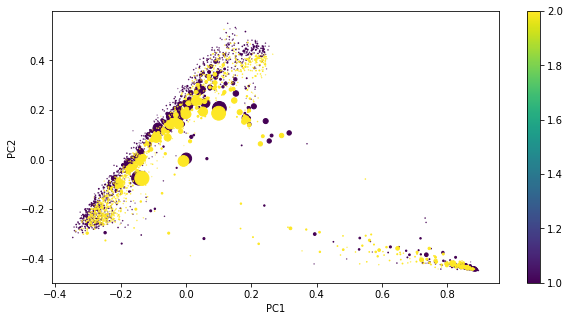

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=  sizes , c= col)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();

ניתן להניח שגידול בציר האיקס מעיד על גידול באחוזי ההצבעה הכללי לתשעת המפלגות וגידול בציר הוואי יכול להעיד על אחוזי הצבעה שהם יותר הטרוגניים בין המפלגות.

כלומר, עיר שנמצאת במיקום גבוה לפי הציר האנכי ניתן לשער ששיעורי ההצבעה שלה לכל מפלגה מסויימת מבין התשע שונה מאחוז ההצבעה לשאר המפלגות.

### **C.**

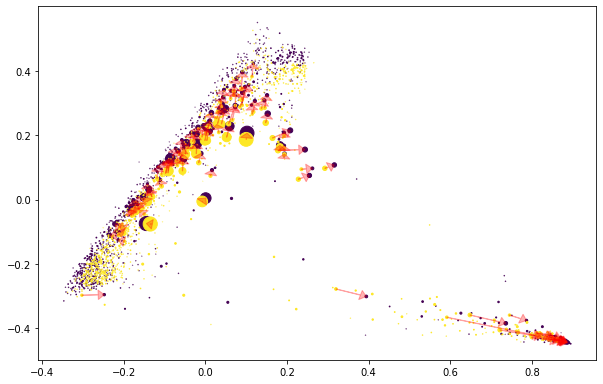

In [14]:
plt.figure(figsize=(10,6.5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=  sizes , c= col)
for i in range(len(df_2019)):
    if df_2019_raw['בזב'][i] >= 10000:
        plt.arrow(X_pca[i+1213, 0], X_pca[i+1213, 1], (X_pca[i, 0]-X_pca[i+1213, 0]), (X_pca[i, 1]-X_pca[i+1213, 1]), color='red', alpha =0.3,length_includes_head=True,head_width=0.03, head_length=0.015)


ניתן לראות על פי ריכוזי החצים ואורכם שברוב היישובים אחוזי ההצבעה בין 2019 ל-2020 לא השתנו דרמטית. 

הסיבה לגך יכולה להיות פרק הזמן הקצר שעבר בין מערכות הבחירות- רק מספר חודשים ,ולכן אחוזי ההצבעה למפלגות האלה כנראה לא ישתנה דרמטית בפרק זמן כזה

### **D.**

In [15]:
# 3 cities with the biggest difference

# compute the differnce between all cities
distance_list = []
for i in range(len(df_9par_2019)):
    distance_list.append(math.sqrt(((X_pca[i,0]-X_pca[i+1213,0])**2)+((X_pca[i,1]-X_pca[i+1213,1])**2)))

max_dist = pd.DataFrame(distance_list).nlargest(n=3,columns=0)[0] # save the index of the 3 largest cities
max_distance = list(max_dist.index)
max_distance_index = list(df_9par_2020.index[max_distance]) #find these cities by index

max_distance_index

['אל סייד', 'סייד שבט', 'כחלה']

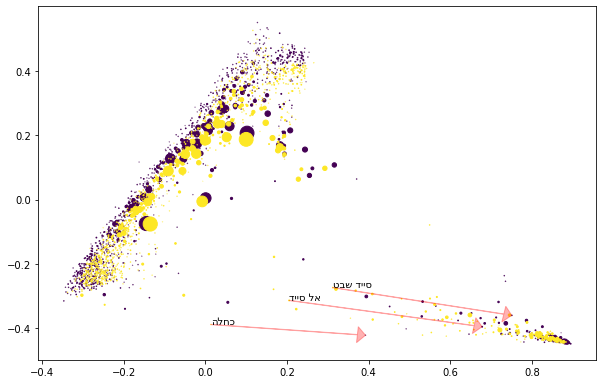

In [16]:
plt.figure(figsize=(10,6.5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=  sizes , c= col)
for i in range(len(max_distance)):
    x= max_distance[i]
    plt.arrow(X_pca[x+1213, 0], X_pca[x+1213, 1], (X_pca[x, 0]-X_pca[x+1213, 0]), (X_pca[x, 1]-X_pca[x+1213, 1]), color='red', alpha =0.3,length_includes_head=True,head_width=0.05, head_length=0.02)
    plt.annotate(max_distance_index[i][::-1], (X_pca[x+1213][0],X_pca[x+1213][1]), size=10)


**פונקצייה להשוואה בין מערכות הבחירות**

In [17]:
def parties_bar(city1, city2):
    width = 0.3  # set column width
    n = len(city1)  # number of parties
    names = party_dict.values()
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city1_bar = ax.bar(np.arange(n), list(city1), width, color='r')
    city2_bar = ax.bar(np.arange(n) + width, list(city2), width, color='b')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title(city1.name [::-1])
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    ax.legend((city1_bar[0], city2_bar[0]), ('2020','2019'))
    plt.show()

    return fig, ax

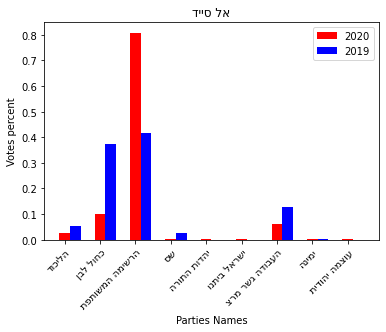

In [18]:
fig, ax = parties_bar(X.iloc[max_distance[0]],X.iloc[max_distance[0]+1213])

**ביישוב אל סייד ניתן לראות גידול משמעותי מאוד באחוזי ההצבעה לרשימה משותפת על חשבון כחול לבן.** 

**אבל מכיוון שאחוז ההצבעה לרשימה המשותפת היה גדול גם ב-2019, אותו גידול מתבטא גם באחוזי ההצבעה הכלליים ולכן זה השינוי הגדול שעבר היישוב ממערכת הבחירות ב-2019 ל-2020.**

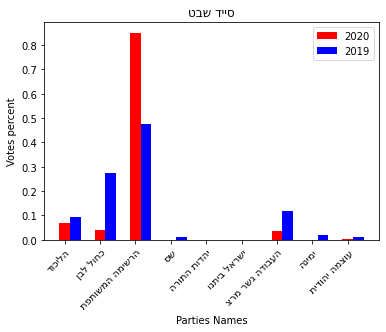

In [19]:
fig, ax = parties_bar(X.iloc[max_distance[1]], X.iloc[max_distance[1]+1213])

**בשבט סייד ניתן לראות תוצאות דומות לתוצאות ביישוב אל סייד וגם שם הגידול באחוז ההצבעה לרשימה המשותפת הוביל לגידול באחוזי ההצבעה הכלליים**

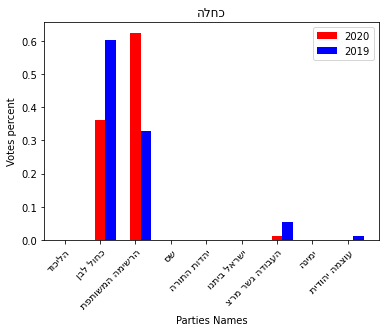

In [20]:
fig, ax = parties_bar(X.iloc[max_distance[2]], X.iloc[max_distance[2]+1213])

**ביישוב כחלה ניתן לראות דווקא מעין סימטריות בהצעה לכחול לבן והמשותפת בין מערכות הבחירות- ב2019 כחול לבן קיבלה באופן יחסי את החלק שהמשותפת קיבלה ב-2020 ולהפך.**

**ניתן לראות שב-2020 בחרו המצביעים לפנות למפלגות הערביות ולא לתמוך במפלגות השמאל- מרכז- וזה יכול להיות ההסבר לירידה בהצבעה לכחול לבן והעבודה-גשר-מרצ ב-2020**

# **Q.2:**

### **A.**

**import data for Q.2:**

In [21]:
df_2020_ballot_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_ballot_raw['שם ישוב'] = df_2020_ballot_raw.index
df_2020_ballot_raw = df_2020_ballot_raw.drop(['מעטפות חיצוניות'], axis=0)
df_2019_ballot_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2019b.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2019_ballot_raw['שם ישוב'] = df_2019_ballot_raw.index
df_2019_ballot_raw = df_2019_ballot_raw.drop(['מעטפות חיצוניות'], axis=0)

**:איחוד העבודה גשר מרצ גם בבחירות 2019 ושינוי האותיות של עוצמה יהודית ב-2019 מ-כף לנץ**

In [22]:
df_2019_ballot_raw['אמת'] = df_2019_ballot_raw['אמת'] + df_2019_ballot_raw['מרצ']
df_2019_ballot_raw = df_2019_ballot_raw.drop(['מרצ','נץ'], axis=1)

In [23]:
df_2019_ballot_raw = df_2019_ballot_raw.rename(columns =  {'כף' : 'נץ'})

In [24]:
df_2020_ballot = df_2020_ballot_raw[df_2020_ballot_raw.columns[10:-1]] # removing "metadata" columns
df_2019_ballot = df_2019_ballot_raw[df_2019_ballot_raw.columns[10:-1]] # removing "metadata" columns

**יצירת דאטה פריים מאוחד לקלפיות של שתי מערכות הבחירות**

In [25]:
join_result = pd.merge(df_2019_ballot_raw, df_2020_ballot_raw,on=["סמל ישוב","קלפי"])   
join_result= join_result.rename(columns =  {'שם ישוב_y' : 'שם ישוב'})
df_2019_ballot_raw = df_2019_ballot_raw.drop(['שם ישוב'], axis=1)
df_2020_ballot_raw = df_2020_ballot_raw.drop(['שם ישוב'], axis=1)

**: 'בחלק השני בחרנו בסעיפים ג' ו-ד**

### **C. עשרת הקלפיות בהן אחוז ההצבעה הכללי היה מקסימלי**

**:חישוב ממוצע אחוז ההצבעה הכללי בכל מערכת בחירות**

In [26]:
per_2019 = (join_result['כשרים_x']).div(join_result['בזב_x'])
per_2020 = (join_result['כשרים_y']).div(join_result['בזב_y'])
average_per = (per_2019+per_2020)/2
join_result['mean'] = average_per

**מציאת עשרת הקלפיות עם הממוצע המקסימלי**

In [27]:
mean_ballot = join_result.sort_values(['mean'], ascending=[False])
mean_ballot.index = mean_ballot['שם ישוב']
mean_ballot = (mean_ballot[['קלפי','mean']]).head(10)
mean_ballot_city = list(mean_ballot.index)
mean_ballot_ballot = list(mean_ballot['קלפי'])

עשרת הקלפיות עם ממוצע אחוז ההצבעה הכללי הגבוה ביותר

In [28]:
mean_ballot

,קלפי,mean
שם ישוב,,
כרמים,1.0,0.935765
חיפה,343.0,0.933709
עמיחי,1.0,0.930928
חצור הגלילית,3.0,0.922786
אשדוד,273.0,0.920917
יסודות,1.0,0.919796
תלם,1.0,0.918868
אשדוד,186.0,0.917553
זמרת,1.0,0.915841


**יצירת טבלאות חדשות עבור הגרפים בהמשך**

In [29]:
# data frame with בזב and כשרים for each election
join_mean = pd.merge(mean_ballot, join_result, on=["שם ישוב","קלפי"])[['בזב_x','כשרים_x','בזב_y','כשרים_y']]    # x=2019, y=2020

# data frame with the 9 parties for the subplots
df_mean_2020 = pd.merge(mean_ballot,df_2020_ballot_raw,on=["שם ישוב","קלפי"])[party_dict]
df_mean_2020 = df_mean_2020.div(df_mean_2020.sum(axis=1), axis=0)
df_mean_2019 = pd.merge(mean_ballot,df_2019_ballot_raw,on=["שם ישוב","קלפי"])[party_dict]
df_mean_2019 = df_mean_2019.div(df_mean_2019.sum(axis=1), axis=0)

**Function for the subplots:**

In [30]:
def sub_parties_plot(df1, df2, ballot, join):

  fig = plt.figure(figsize=(23,8))
  fig.subplots_adjust(hspace = 1.1, wspace = 0.4)

  count = 1
  for i in range(10): 
      ax = fig.add_subplot(2,5,count)
      names = party_dict.values()
      rev_names = [name[::-1] for name in list(names)]

      n = 9
      width = 0.3

      bar1 = plt.bar(np.arange(n), list(df1.iloc[i]), width, align='center', alpha=0.8, color='r')
      bar2 = plt.bar(np.arange(n) + width, list(df2.iloc[i]), width, align='center', alpha=0.8, color='b')
      plt.ylabel('Votes percent')
      title = (df1.iloc[i].name [::-1])
      plt.title("{n_t} , {Te_t} ".format(Te_t=df1.iloc[i].name [::-1], n_t=ballot[i]))
      plt.xticks(np.arange(n), rev_names, rotation=45, ha="right",rotation_mode="anchor")
      ax.text(0.5,-0.8,  "בזב 2019: {A}  ,  םירשכ 2019: {B}\nבזב 2020: {C}  ,  םירשכ 2020: {D}".format(A= join.iloc[i,0], B=join.iloc[i,1],C = join.iloc[i,2], D=join.iloc[i,3]), size=12, ha="center",
              bbox=dict(facecolor='orange', alpha=0.5), transform=ax.transAxes)

      plt.legend((bar1[0], bar2[0]), ('2020','2019'))
      count +=1

  # Show the plots
  plt.show()

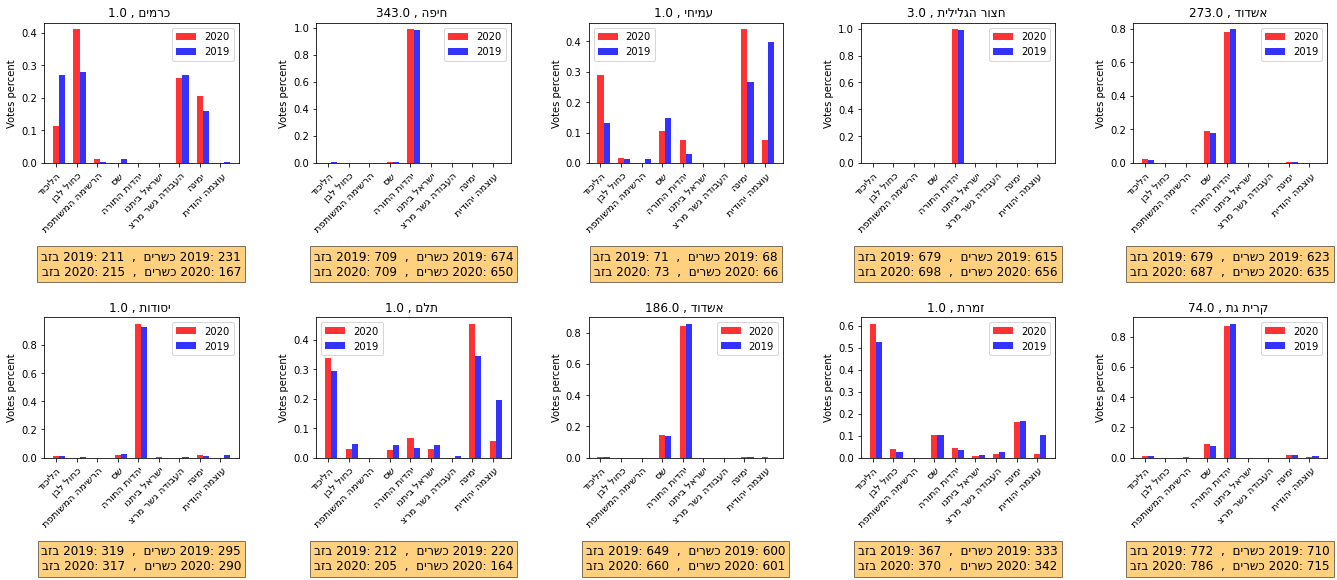

In [31]:
sub_parties_plot(df_mean_2020,df_mean_2019, mean_ballot_ballot, join_mean)

: ניתן לראות תוצאות חשודות בגרף

לדוגמה- בקלפי 1 בכרמים ובקלפי 1 בתלם אחוז ההצבעה הכללי ב-2019 היה גבוה מ- 100%. 
דבר שאינו אפשרי ומעיד על טעויות ברישום הקולות וכתוצאה מכך טעויות בתוצאות הסופיות. 

כמו כן, בגלל ההטיה הזו לא ניתן להסיק על כיוון המגמה ועל השינוי האמיתי בין 2019 ל-2020 בקלפיות הללו , ומאותה סיבה גם אותן קלפיות דורגו במיקום הגבוה ביותר בממוצע אחוזי ההצבעה הכללי שכן התוצאות ב-2019 הזיזו את הממוצע כלפי מעלה בצורה קיצונית. 

באופן כללי ממוצע אחוז ההצבעה הכללי בכל הקלפיות הללו הוא יותר מ-90%.
 ניתן להסיק מכך שזהו אחוז מאוד גבוה ומכך שהעמודות הכחולות והאדומות ברוב היישובים יחסית דומות, שאחוז ההצבעה בין 2019 ל-2020 לא השתנה דרמטית, כפי שניתן לומר גם על אחוז ההצבעה הכללי במדינה באותן מערכות בחירות.

### **D. עשרת הקלפיות בהן חל השינוי הגדול ביותר בין מערכות הבחירות**

**:חישוב ממוצע אחוז ההצבעה הכללי בכל מערכת בחירות**

In [32]:
diff = abs(per_2019 - per_2020)
join_result['diff'] = diff

**מציאת עשרת הקלפיות עם הממוצע המקסימלי**

In [33]:
diff_ballot = join_result.sort_values(['diff'], ascending=[False])
diff_ballot= diff_ballot.rename(columns =  {'שם ישוב_y' : 'שם ישוב'})
diff_ballot.index = diff_ballot['שם ישוב']
diff_ballot = (diff_ballot[['קלפי','diff']]).head(10)
diff_ballot_city = list(diff_ballot.index)
diff_ballot_ballot = list(diff_ballot['קלפי'])

עשרת הקלפיות עם ההפרש הגדול ביותר בין מערכת הבחירות ב-2019 ל-2020

In [34]:
diff_ballot 

,קלפי,diff
שם ישוב,,
שפרעם,34.0,0.682181
עראבה,11.0,0.674927
כסראסמיע,5.0,0.588134
כסראסמיע,2.0,0.553257
כסראסמיע,9.0,0.379078
עראמשה,2.0,0.377934
כסראסמיע,6.0,0.350470
ירכא,10.0,0.320482
כרמים,1.0,0.318043


**יצירת טבלאות חדשות עבור הגרפים בהמשך**

In [35]:
# data frame with בזב and כשרים for each election
join_diff = pd.merge(diff_ballot, join_result, on=["שם ישוב","קלפי"])[['בזב_x','כשרים_x','בזב_y','כשרים_y']]  # x=2019, y=2020

# data frame with the 9 parties for the subplots
df_diff_2020 = pd.merge(diff_ballot,df_2020_ballot_raw,on=["שם ישוב","קלפי"])[party_dict]
df_diff_2020 = df_diff_2020.div(df_diff_2020.sum(axis=1), axis=0)
df_diff_2019 = pd.merge(diff_ballot,df_2019_ballot_raw,on=["שם ישוב","קלפי"])[party_dict]
df_diff_2019 = df_diff_2019.div(df_diff_2019.sum(axis=1), axis=0)

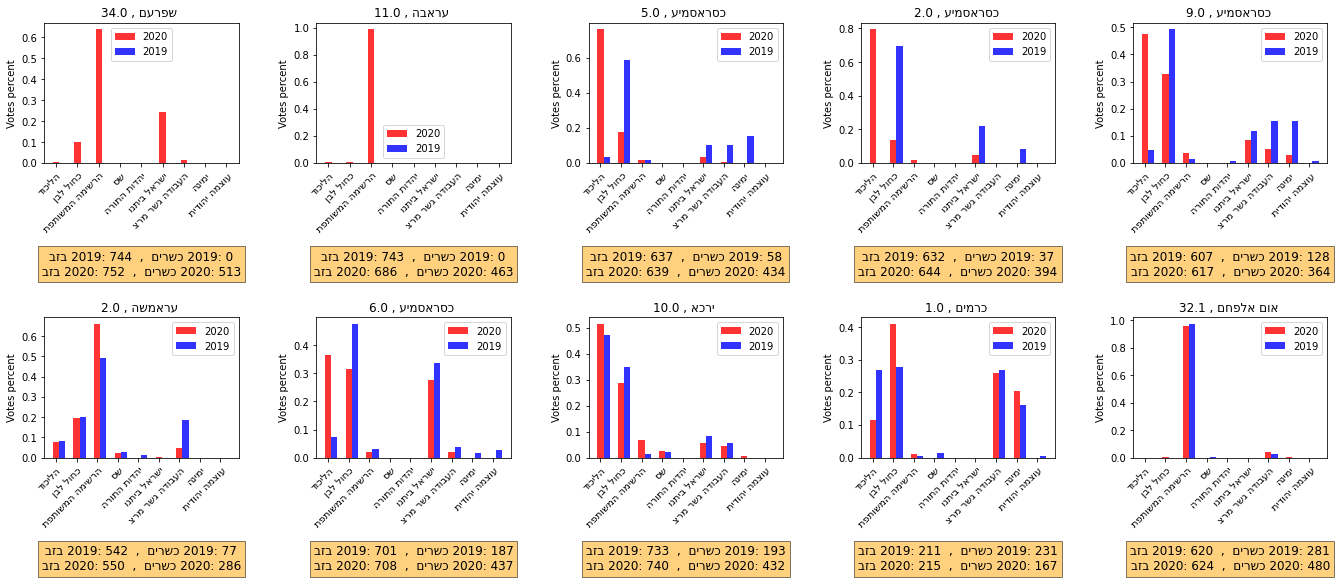

In [36]:
sub_parties_plot(df_diff_2020,df_diff_2019, diff_ballot_ballot,join_diff)

ניתן לראות גם בגרף הזה תוצאות חשודות

בקלפי 34 בשפרעם ובקלפי 11 בעראבה ב-2019 ניתן לראות שמספר הקולות הכשרים היה 0 בזמן שמספר הבזב באותן קלפיות היה גדול מ-0, לכן ניתן להסיק מכך שאותן קלפיות היו חשודות בעיני ועדות הקלפי ולכן הן נפסלו לספירה ולא נכללו בתוצאות הבחירות.
כמו כן, מספר המצביעים בקלפיות האלה היה גדול מ-0 ולכן בהכרח הן נפסלו.
(לשם בדיקה נוספת, בדקנו את הקלפיות הללו באתר ועדת הבחירות ואכן הן נפסלו)

כמו כן, מכיוון שאותן קלפיות לא נפסלו ב-2020 אכן ניתן לראות בהן את השינוי הגדול ביותר בין מערכות הבחירות כי המעבר הוא מ-0% ב-2019 ליותר מ-50% ב-2020, ולכן ניתן להניח שהן יכנסו לרשימת הקלפיות עם השינוי הגדול ביותר, כפי שאכן קרה.

בנוסף, ניתן לראות שגם בגרף הזה הקלפי בכרמים מופיע שכן השינוי בקלפי זו הוא בכיוון ההפוך- מיותר מ-100% להרבה פחות מכך.

באופן כללי, ניתן לראות שגודל 10 השינויים הגדולים ביותר בין מערכות הבחירות הוא 30%-70%. שהם אכן שינויים מאוד גדולים, אבל ניתן להניח שבשאר היישובים השינויים לא מהותיים שכן אחוז ההצבעה הארצי לא השתנה דרמטית בין מערכות הבחירות
